#  Group 12 PDS Final Project

<div class="alert alert-warning"> This is a work in progress  </div>

### Note for group 12: Import any necessary libraries here

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import re 
import numpy as np


#There IS an easier way to do this, just not one that i got to run for some reason. 

your_dir = os.getcwd()          # For the sake of getting the path for each group member, its dynamic
datasets = os.path.join(your_dir, "Datasets") # Originally i made it by conjoining a string. Using OS made it work across devices as some have different notation

datasets


'c:\\Users\\ochix\\Desktop\\MSc BA Esade\\Term 1\\Python for Data Science\\Final Project\\Datasets'

## Pre-Processing of the Dataset

First we look if the datasets have missing values in order to impute if needed. 

In [2]:
# We list the file names
file_names = ["BRK-A.csv", "DNUT.csv", "DPZ.csv", "LKNCY.csv", "MCD.csv",
              "PZZA.csv", "QSR.csv", "SBUX.csv", "WEN.csv", "YUM.csv"]

directory = r"Datasets"

for file_name in file_names:
    file_path = os.path.join(directory, file_name)
    df = pd.read_csv(file_path)
    
    print(f"Checking {file_name} for missing values:")
    missing_values = df.isnull().sum()
    print(missing_values)
   


Checking BRK-A.csv for missing values:
Date           0
Open         541
High         546
Low          543
Close        549
Adj Close    547
Volume       561
dtype: int64
Checking DNUT.csv for missing values:
Date          0
Open         40
High         40
Low          40
Close        39
Adj Close    40
Volume       40
dtype: int64
Checking DPZ.csv for missing values:
Date           0
Open         250
High         248
Low          245
Close        245
Adj Close    247
Volume       254
dtype: int64
Checking LKNCY.csv for missing values:
Date          0
Open         66
High         66
Low          65
Close        66
Adj Close    67
Volume       67
dtype: int64
Checking MCD.csv for missing values:
Date           0
Open         724
High         713
Low          714
Close        721
Adj Close    708
Volume       734
dtype: int64
Checking PZZA.csv for missing values:
Date           0
Open         390
High         379
Low          381
Close        386
Adj Close    379
Volume       394
dtype: 

Since we have many missing values, we are going to create a dictionary to store each dataset into a dataframe for further analysis and processing. Also we are imputing these missing values using linear interpolation, which estimates missing values based on the surrounding data points, potentially providing more accurate and realistic imputed values, especially for financial time series data like stock prices.

In [3]:
# We define the variables to be imputed
variables = ["Open", "High", "Low", "Close", "Adj Close", "Volume"]

# Create a dictionary to store the dataframes
dataframes = {}

for file_name in file_names:
    file_path = os.path.join(directory, file_name)
    df = pd.read_csv(file_path)
    
    # We make sure the dataframe is sorted by the "Date" column
    df['Date'] = pd.to_datetime(df['Date'])  # We convert the "Date" column to datetime
    df = df.sort_values(by='Date')
    
    # Here we use linear interpolation to impute missing values in each column
    for col in variables:
        df[col] = df[col].interpolate(method="linear", limit_direction="both")
    
    df = df.round(2)  # We do this so as to not have too many decimals
    
    # Store the dataframe in the dictionary
    dataframes[file_name] = df
    
    # Display the results of the imputations
    print(f"Data for {file_name}:")
    print(df.head(5), "\n")

Data for BRK-A.csv:
        Date   Open   High    Low       Close  Adj Close   Volume
0 1980-03-17  290.0  310.0  290.0  1198073.65      290.0  10000.0
1 1980-03-18  290.0  290.0  290.0      290.00      290.0      0.0
2 1980-03-19  290.0  310.0  290.0      290.00      290.0  20000.0
3 1980-03-20  290.0  290.0  290.0      290.00      290.0      0.0
4 1980-03-21  290.0  290.0  290.0      290.00      290.0      0.0 

Data for DNUT.csv:
        Date   Open   High    Low  Close  Adj Close      Volume
0 2021-07-01  16.30  21.69  15.50  21.00      20.36  40888200.0
1 2021-07-02  19.85  20.45  18.32  19.12      18.54   8631400.0
2 2021-07-06  18.90  19.31  17.00  17.00      16.48   3973000.0
3 2021-07-07  17.29  18.16  17.00  17.78      17.24   3213500.0
4 2021-07-08  17.25  18.35  17.00  18.20      17.65   5448300.0 

Data for DPZ.csv:
        Date   Open   High    Low  Close  Adj Close      Volume
0 2004-07-13  14.00  14.10  13.49  13.50       6.14  14964100.0
1 2004-07-14  13.50  13.55  12.

In [4]:
# Finally we check the missing values in each dataframe in the dictionary
for file_name, df in dataframes.items():
    missing_values_count = df.isnull().sum().sum()
    print(f"Number of missing values in {file_name} after imputations: {missing_values_count}")


Number of missing values in BRK-A.csv after imputations: 0
Number of missing values in DNUT.csv after imputations: 0
Number of missing values in DPZ.csv after imputations: 0
Number of missing values in LKNCY.csv after imputations: 0
Number of missing values in MCD.csv after imputations: 0
Number of missing values in PZZA.csv after imputations: 0
Number of missing values in QSR.csv after imputations: 0
Number of missing values in SBUX.csv after imputations: 0
Number of missing values in WEN.csv after imputations: 0
Number of missing values in YUM.csv after imputations: 0


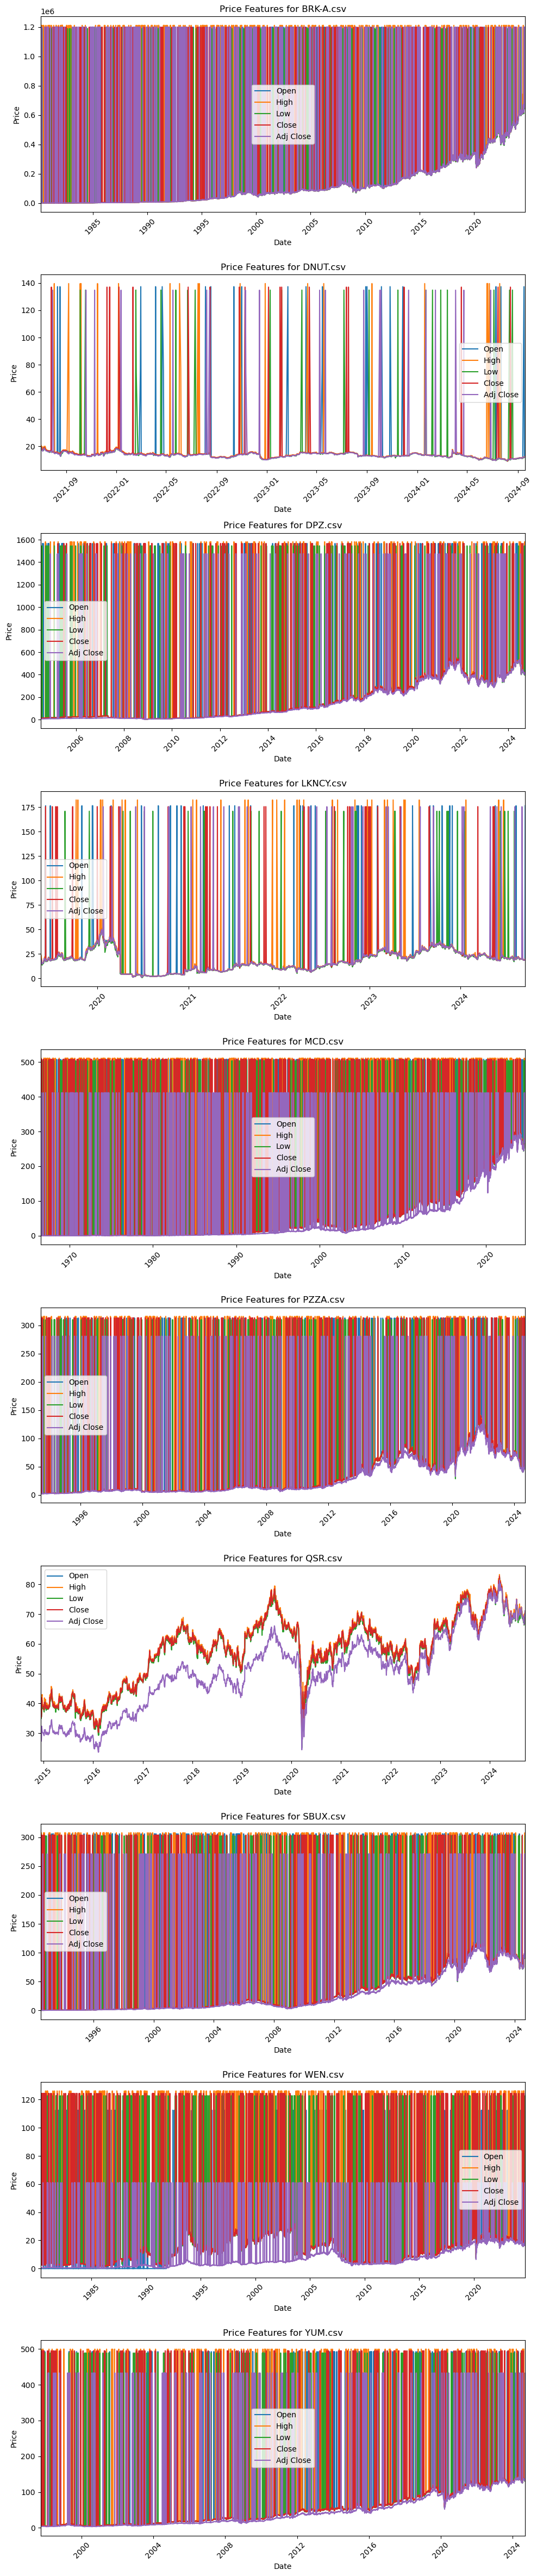

In [5]:
# Define the variables to be plotted (excluding Volume)
variables = ["Open", "High", "Low", "Close", "Adj Close"]

def plot_all_datasets_vertically(dataframes, variables):
    # Set up the plot
    fig, axs = plt.subplots(len(dataframes), 1, figsize=(10, 5 * len(dataframes)), sharex=False)

    # Ensure to use consistent colors for each feature across all plots
    colors = plt.get_cmap('tab10')

    # Iterate through each dataframe and plot the price features
    for idx, (file_name, df) in enumerate(dataframes.items()):
        ax = axs[idx]
        for i, var in enumerate(variables):
            ax.plot(df['Date'], df[var], label=var, color=colors(i))
        ax.set_title(f'Price Features for {file_name}')
        ax.set_xlabel('Date')
        ax.set_ylabel('Price')
        ax.legend()
        ax.tick_params(axis='x', rotation=45)
        ax.set_xlim([df['Date'].min(), df['Date'].max()])

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

# Example usage
plot_all_datasets_vertically(dataframes, variables)


## Remove Outliers
By quickly looking at the values, it's evident that numerous outliers are present in the dataset. These anomalies could significantly skew our forthcoming analyses and visualizations. It’s crucial to address them to ensure the integrity and accuracy of our results. Since "Volume" could change a lot depending on several factor we will not use the outlier removal.

In [6]:
# Define the variables to be imputed, excluding "Volume"
variables = ["Open", "High", "Low", "Close", "Adj Close"]
window_size = 30
mad_threshold = 3.5

# Iterate over each dataframe in the dictionary
for file, data in dataframes.items():
    for col in variables:  # Loop through all the variables

        # Compute the rolling median for the specified column
        rolling_median = data[col].rolling(window=window_size, center=True, min_periods=1).median()

        # Compute the Median Absolute Deviation (MAD) for the specified column within a rolling window
        mad = data[col].rolling(window=window_size, center=True, min_periods=1).apply(
            lambda x: np.median(np.abs(x - np.median(x))), raw=True
        )

        # Define a threshold for detecting outliers by multiplying the MAD by the given threshold multiplier (mad_threshold)
        threshold = mad_threshold * mad

        # Identify outliers based on the threshold
        outliers = (data[col] - rolling_median).abs() > threshold
        
        # Replace outliers with NaN
        data.loc[outliers, col] = np.nan
    
    # Update the dataframe in the dictionary after marking outliers
    dataframes[file] = data

for file, data in dataframes.items():
    for col in variables:
        # Interpolate NaN values linearly
        data[col] = data[col].interpolate(method="linear", limit_direction="both")
    
    # Round numerical values to two decimal places
    data = data.round(2)
    
    # Update the dataframe in the dictionary
    dataframes[file] = data

# Display the results of the imputations
for file_name, df in dataframes.items():
    print(f"Data for {file_name}:")
    print(df.head(5), "\n")


Data for BRK-A.csv:
        Date   Open   High    Low  Close  Adj Close   Volume
0 1980-03-17  290.0  310.0  290.0  290.0      290.0  10000.0
1 1980-03-18  290.0  290.0  290.0  290.0      290.0      0.0
2 1980-03-19  290.0  290.0  290.0  290.0      290.0  20000.0
3 1980-03-20  290.0  290.0  290.0  290.0      290.0      0.0
4 1980-03-21  290.0  290.0  290.0  290.0      290.0      0.0 

Data for DNUT.csv:
        Date   Open   High    Low  Close  Adj Close      Volume
0 2021-07-01  16.30  21.69  15.50  19.12      18.54  40888200.0
1 2021-07-02  19.85  20.45  18.32  19.12      18.54   8631400.0
2 2021-07-06  18.90  19.31  17.00  17.00      16.48   3973000.0
3 2021-07-07  17.29  18.16  17.00  17.78      17.24   3213500.0
4 2021-07-08  17.25  18.35  17.00  18.20      17.65   5448300.0 

Data for DPZ.csv:
        Date   Open   High    Low  Close  Adj Close      Volume
0 2004-07-13  14.00  14.10  13.49  13.50       6.14  14964100.0
1 2004-07-14  13.50  13.55  12.91  13.44       6.12   2801000

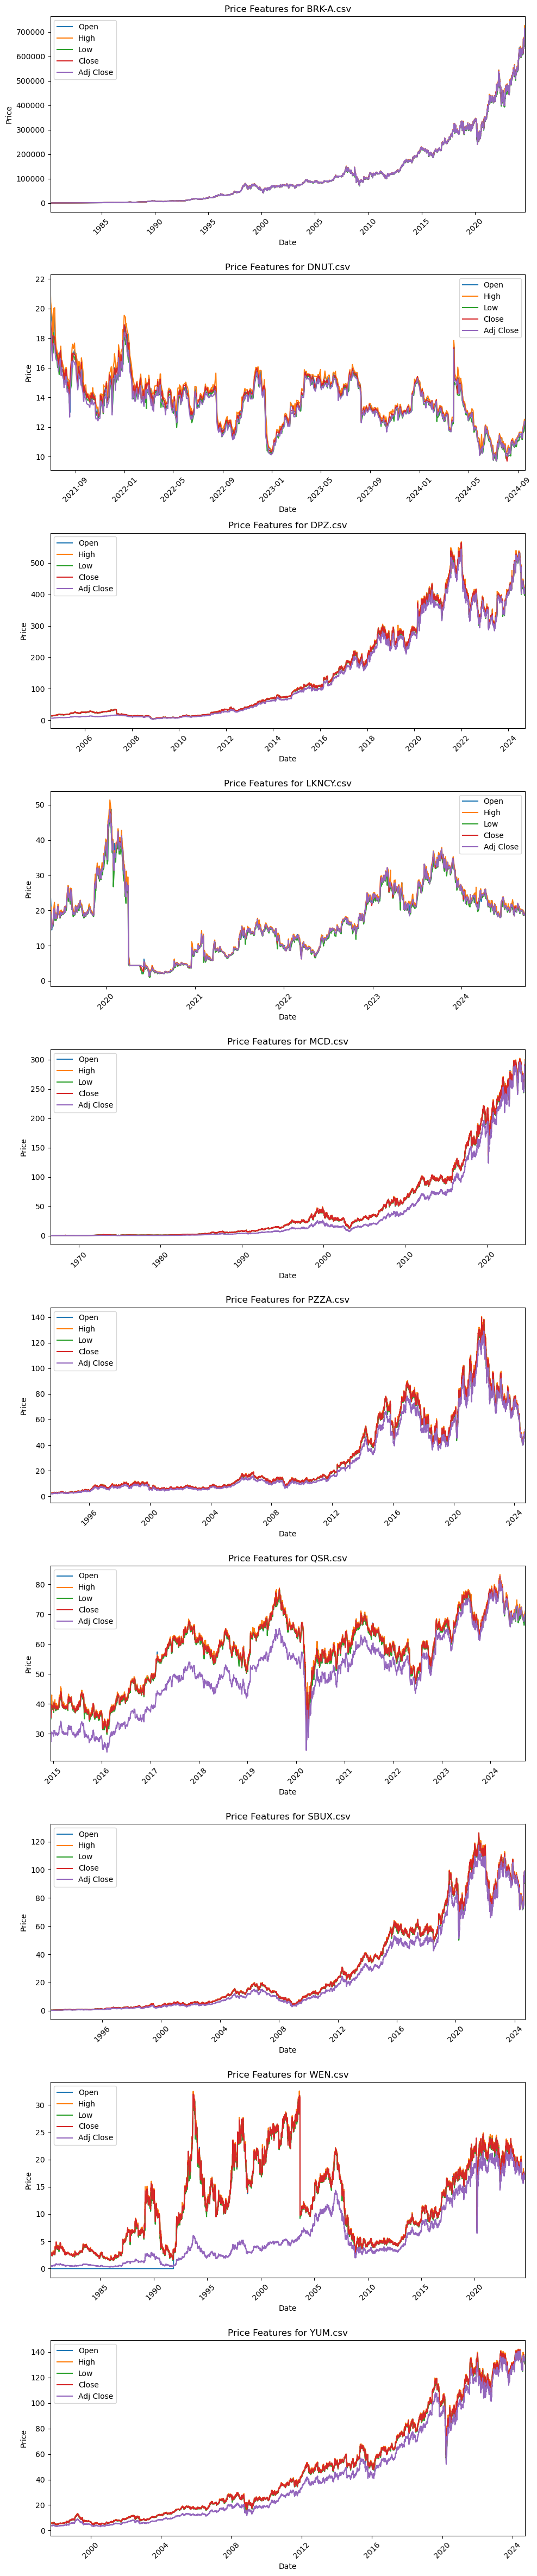

In [7]:
plot_all_datasets_vertically(dataframes, variables)

With these last plots, we realize that the outlier removal was crucial to begin with the project.

# Exercises
### 1: For each dataset:

 • Print the number of rows and columns
 
 • Display the column names and their data types


In [3]:
for file in os.listdir(datasets):                       # We loop through the files
    df = pd.read_csv(os.path.join(datasets, file))      # By using path join, we ensure the file can be run in different systems (NOTE: THEORETICAL, please let me know if this works and then delete this note)
    print(f"Information for the file '{file}'")         # Name, for ease of reading
    print(f"Total rows: {df.shape[0]}")                 # N of rows
    print(f"Total columns: {df.shape[1]}")              # N of columns
    print(df.dtypes)                                    # Data types of the files
    print("----------------------------------")         # Small break, to make it less convoluted


Information for the file 'BRK-A.csv'
Total rows: 11227
Total columns: 7
Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object
----------------------------------
Information for the file 'DNUT.csv'
Total rows: 815
Total columns: 7
Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object
----------------------------------
Information for the file 'DPZ.csv'
Total rows: 5088
Total columns: 7
Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object
----------------------------------
Information for the file 'LKNCY.csv'
Total rows: 1350
Total columns: 7
Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volum

### 2: Extract all rows where the date is in the year 2023. Print the number of rows and visualize the Close
 price trend for this period

File: BRK-A.csv


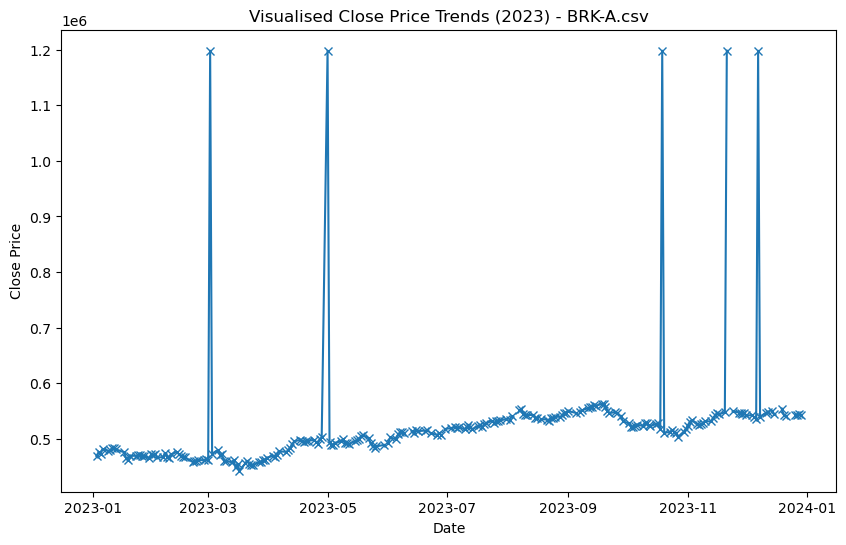

File: DNUT.csv


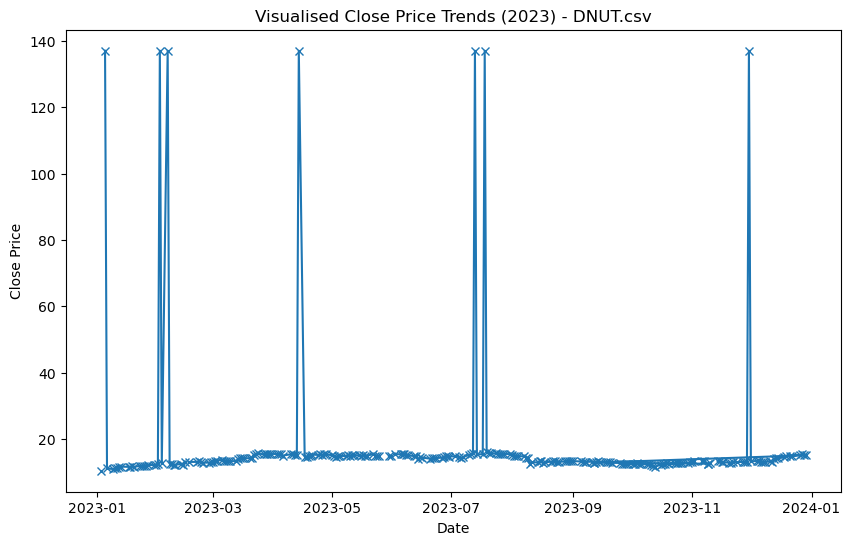

File: DPZ.csv


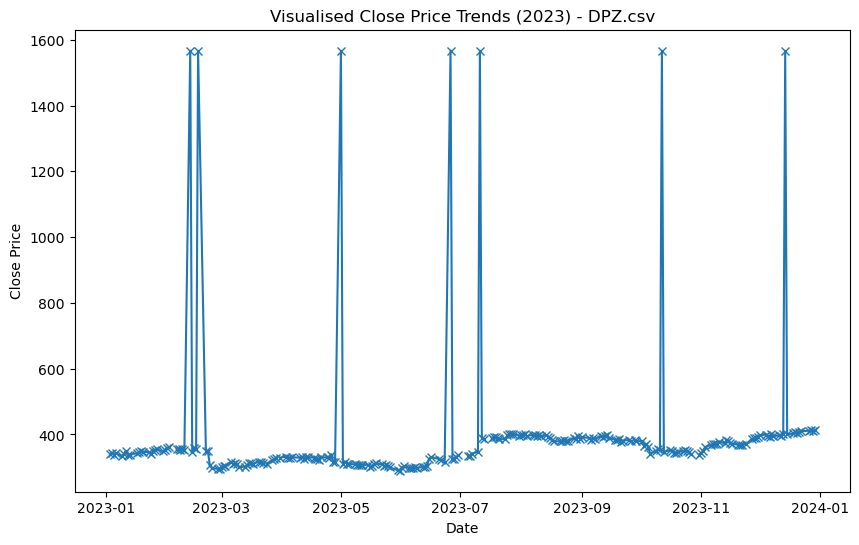

File: LKNCY.csv


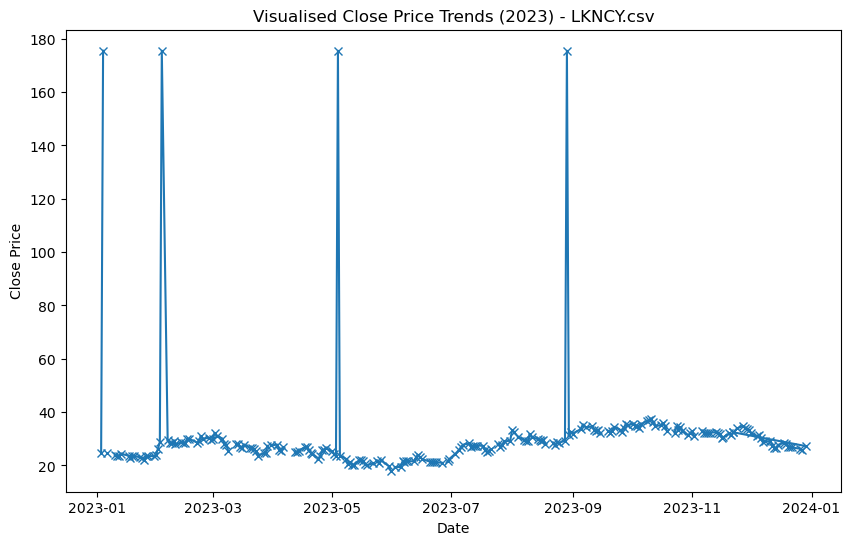

File: MCD.csv


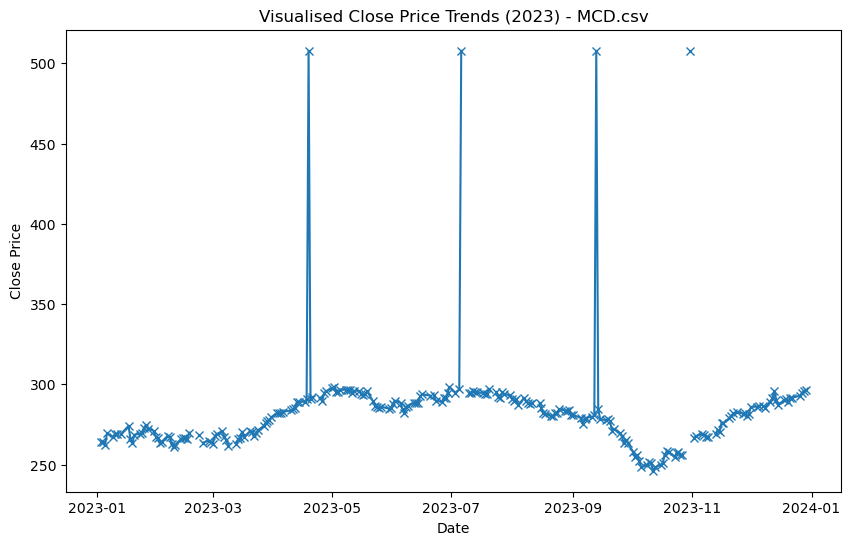

File: PZZA.csv


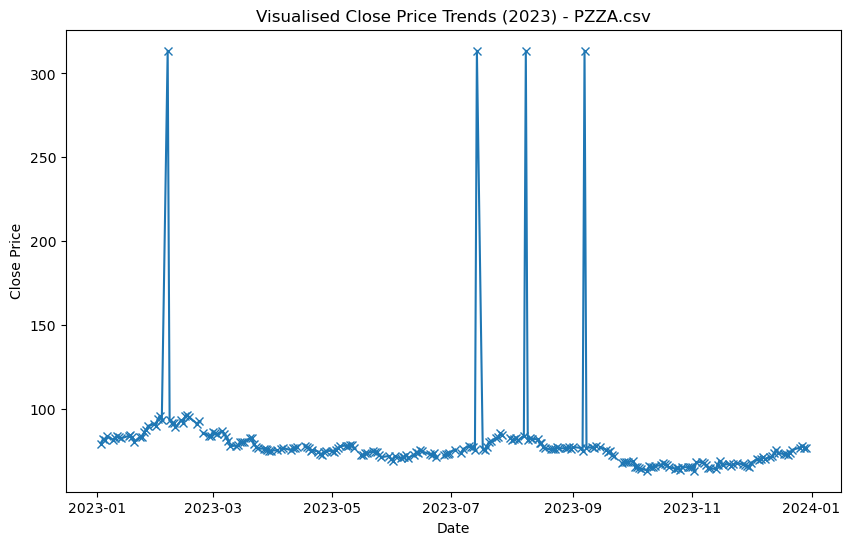

File: QSR.csv


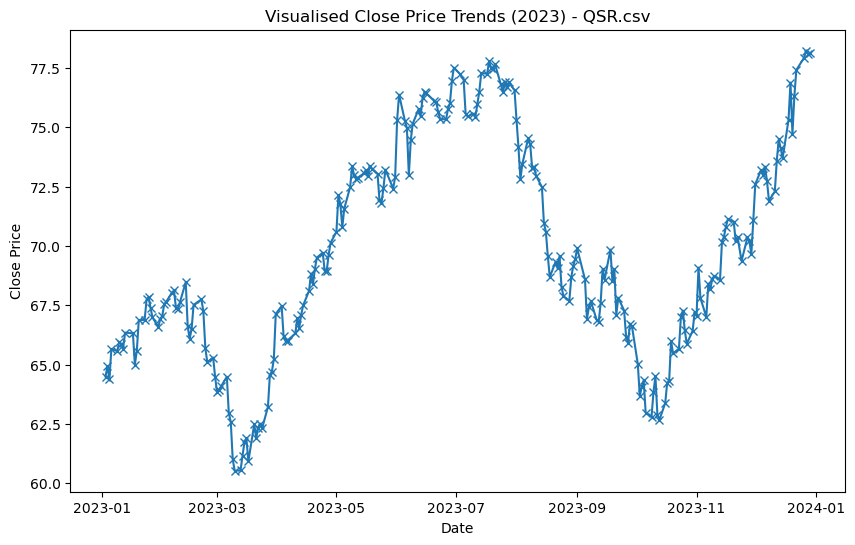

File: SBUX.csv


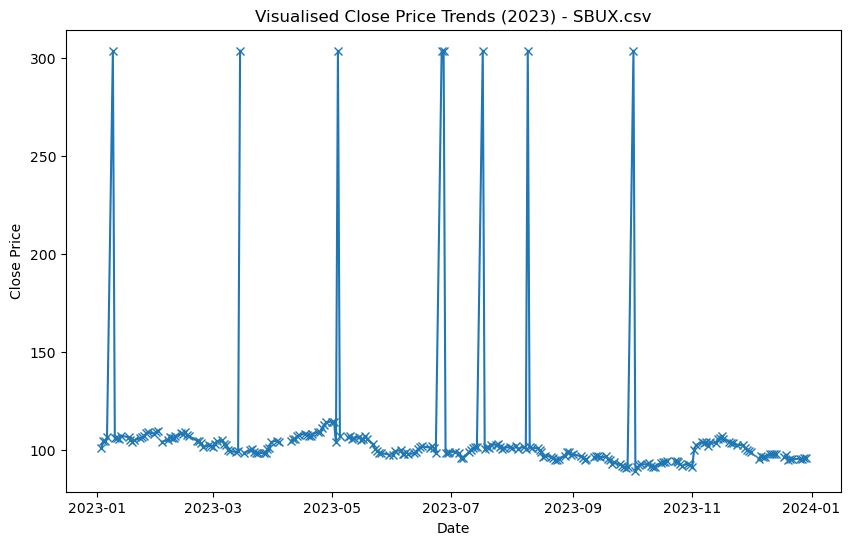

File: WEN.csv


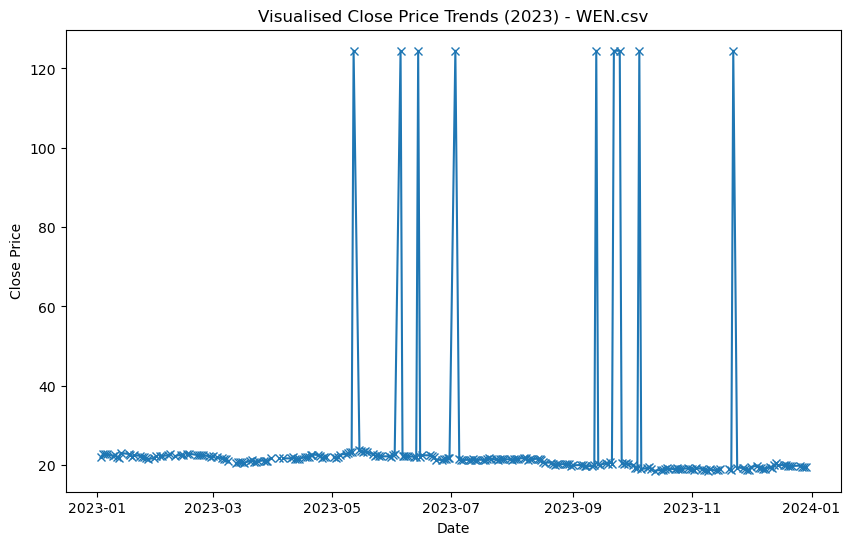

File: YUM.csv


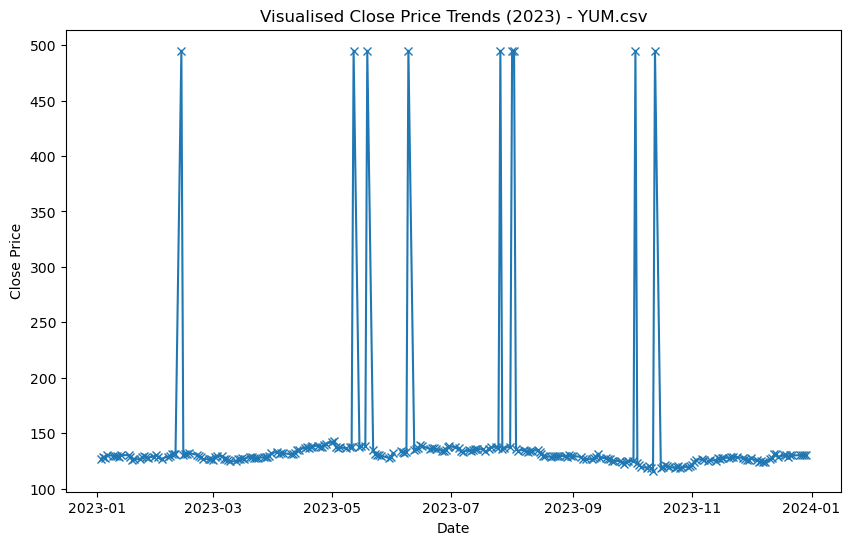

In [33]:
for file in os.listdir(datasets):
    df = pd.read_csv(os.path.join(datasets, file))      # Same code to cycle through the files, as before

    df['Date'] = pd.to_datetime(df['Date'])
    year_2023 = df[df['Date'].dt.year == 2023]

    print(f"File: {file}")
    plt.figure(figsize=(10, 6))
    plt.plot(year_2023['Date'], year_2023['Close'], label=f'{file} Close Price', marker='x')
    plt.title(f'Visualised Close Price Trends (2023) - {file}')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.show()


### 3: For each company, find the day with the highest Close price and display it alongside the price.

In [4]:
for file in os.listdir(datasets):   # Loop through the files
    df = pd.read_csv(os.path.join(datasets, file)) 

    print(f"File: {file}")

    # Find the maximum Close price
    max_close_price = df["Close"].max()

    pattern = r"^(.*)(?=\.csv$)"
    match = re.match(pattern, file)
    if match:
        name = match.group()
        print(f'Max close price for {name}: {max_close_price}')

    # Display days with highest Close price 
    df = df[["Date","Close"]][df["Close"] == max_close_price]
    print(df)
    print("\n") 

File: SBUX.csv
Max close price for SBUX: 303.8577923096404
            Date       Close
19    1992-07-24  303.857792
44    1992-08-28  303.857792
60    1992-09-22  303.857792
144   1993-01-21  303.857792
149   1993-01-28  303.857792
...          ...         ...
7806  2023-06-27  303.857792
7819  2023-07-17  303.857792
7836  2023-08-09  303.857792
7873  2023-10-02  303.857792
8066  2024-07-10  303.857792

[203 rows x 2 columns]


File: DPZ.csv
Max close price for DPZ: 1566.8486330826815
            Date        Close
182   2005-04-01  1566.848633
246   2005-07-01  1566.848633
273   2005-08-10  1566.848633
464   2006-05-15  1566.848633
493   2006-06-26  1566.848633
...          ...          ...
4891  2023-12-14  1566.848633
4947  2024-03-07  1566.848633
4961  2024-03-27  1566.848633
5041  2024-07-23  1566.848633
5058  2024-08-15  1566.848633

[127 rows x 2 columns]


File: MCD.csv
Max close price for MCD: 507.8566813095628
             Date       Close
39     1966-08-29  507.856681
88    

### 4: Group the data by month and calculate the average Close price for each company. Plot these monthly averages for 3 companies and compare them. Justify the chart selection.

In [5]:
i = 0 # Counter
monthly_averages = []   # Initialize an empty list to store monthly averages for plotting
labels = []  # List to store company names

for file in os.listdir(datasets):                       # We loop through the files
    df = pd.read_csv(os.path.join(datasets, file)) 
    
    pattern = r"^(.*)(?=\.csv$)"
    match = re.match(pattern, file)
    if match:
        name = match.group()
        print(f'{name} Average Close Price')

    # Convert date to datetime object
    df['Date'] = pd.to_datetime(df['Date'])

    # Set date as index to perform time series operations
    df.set_index('Date', inplace=True)

    # Resampling the time series data based on months
    # Apply on stock close price  
    # 'ME' standards for month end
    monthly_avg = df.Close.resample('ME').mean()
    print(monthly_avg)
    print("\n") 

    # Counter to store first three monthly average datasets for plotting
    if i < 3:
        i += 1
        monthly_averages.append(monthly_avg)
        labels.append(name)
    else: 
        break

SBUX Average Close Price
Date
1992-06-30     0.347656
1992-07-31    14.848883
1992-08-31    15.572675
1992-09-30    14.913801
1992-10-31     0.471114
                ...    
2024-05-31    76.413334
2024-06-30    80.321053
2024-07-31    85.743082
2024-08-31    87.036667
2024-09-30    95.045384
Freq: ME, Name: Close, Length: 388, dtype: float64


DPZ Average Close Price
Date
2004-07-31     13.534286
2004-08-31     13.744500
2004-09-30     14.728095
2004-10-31     15.777500
2004-11-30     17.362000
                 ...    
2024-05-31    512.880909
2024-06-30    523.253883
2024-07-31    505.652116
2024-08-31    480.494483
2024-09-30    409.414162
Freq: ME, Name: Close, Length: 243, dtype: float64


MCD Average Close Price
Date
1966-07-31      0.259562
1966-08-31     25.604511
1966-09-30      0.185234
1966-10-31      0.170576
1966-11-30     53.611403
                 ...    
2024-05-31    266.246817
2024-06-30    256.508887
2024-07-31    254.738499
2024-08-31    278.598567
2024-09-30    291

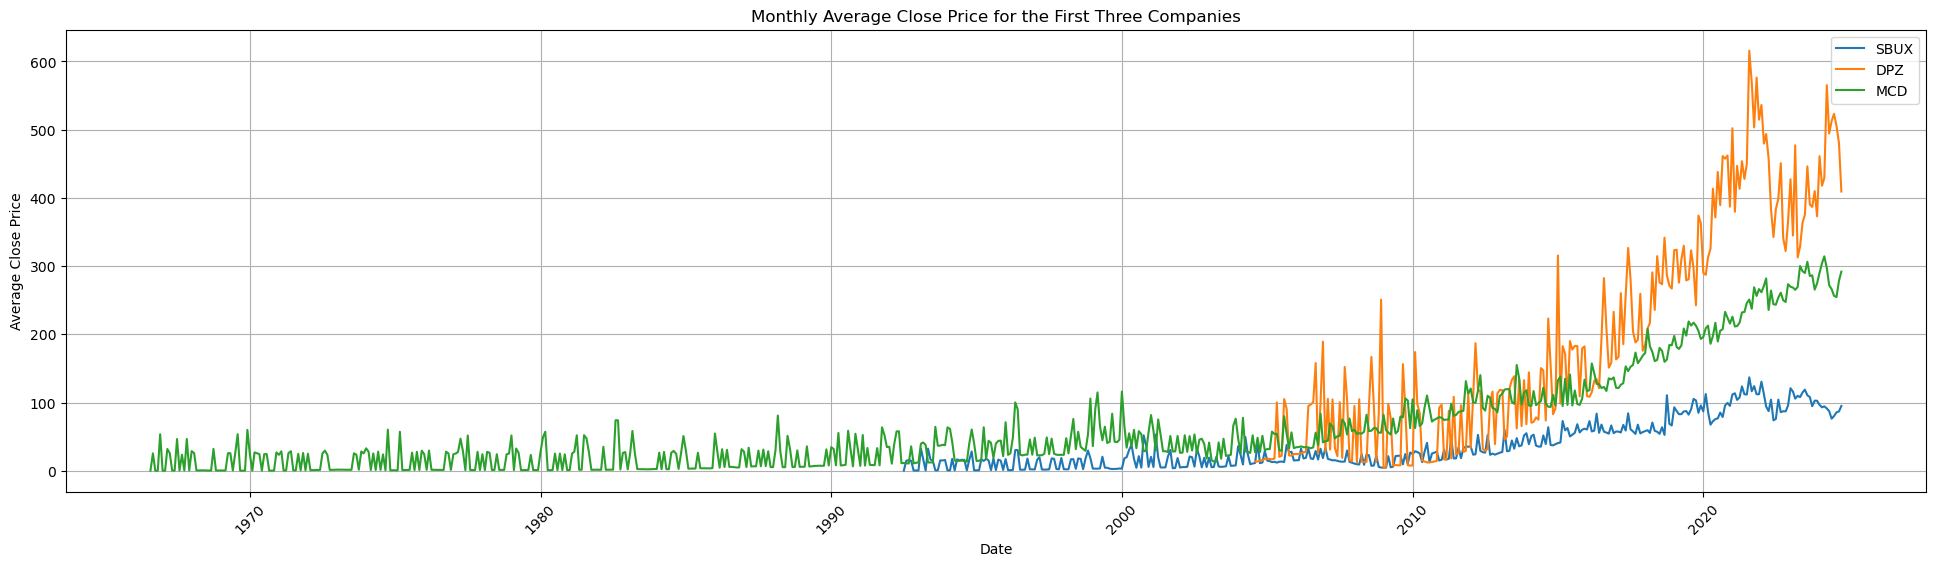

In [6]:
plt.figure(figsize=(24, 6))

# iterate through list to plot each company's monthly average
for i, monthly_avg in enumerate(monthly_averages):
    plt.plot(monthly_avg.index, monthly_avg, label=labels[i])

plt.xlabel('Date')
plt.ylabel('Average Close Price')
plt.title('Monthly Average Close Price for the First Three Companies')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()